# EE16A Discussion 1A

## Solving Systems of Equations: Visualization
### Initialization
First, run this command in your terminal to install some dependencies:

    pip install mpld3 plotly

Then run the code in the next block to set up functions that the other blocks
depend on.

In [1]:
import numpy as np
import mpld3
import numpy.matlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.offline as offline
from plotly.graph_objs import *
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi, cos, exp

%matplotlib inline
mpld3.enable_notebook()
# offline.init_notebook_mode()
offline.init_notebook_mode(connected=True)

# Define the function to be plotted
def fxy(x, y):    
    A = 1  # choose a maximum amplitude 
    return A*(cos(pi*x*y))**2 * exp(-(x**2+y**2)/2.)

def line_xy(a,b,c):
    '''For the parameters a,b,c this function returns an array of (x,y) pairs
    that are on the line ax+by = c'''
    b = b+.00001
    x_range = [-100, 100]
    x = np.linspace(x_range[0],x_range[1],100)
    y = (c - a*x) / b    
    return x, y

def plane_xyz(a,b,c,d):
    '''For the parameters a,b,c,d this function returns an array of (x,y,z) pairs
    that are on the line ax+by+cz = d'''
    
    c = c+.00001
    x_range = [-10, 10]
    x = np.linspace(x_range[0],x_range[1],100)
    y = np.linspace(x_range[0],x_range[1],100)
    yt = y[:,np.newaxis]
    
    x_mat = np.matlib.repmat(x,len(y),1)
    y_mat = np.matlib.repmat(yt,1,len(x))
    z_mat = (d - a*x_mat - b*y_mat) / c
#   for k in range(0,len(zpoints)): 
#           x_short,y_short=line_xy(a,b,c*zpoints[k]+d)
#           z_short=np.ones(len(y_short))*zpoints[k]
#           x=np.append(x,x_short)
#           y=np.append(y,y_short)
#           z=np.append(z,z_short)
    return x, y, z_mat

axis = dict(
    showbackground=True,                  # (!) show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
    range=[-10, 10]
)

# Make a layout object
layout = Layout(
    title='Planes in 3D',   # set plot title
    scene=Scene(            # (!) axes are part of a 'scene' in 3d plots
        xaxis=XAxis(axis),  # set x-axis style
        yaxis=YAxis(axis),  # set y-axis style
        zaxis=ZAxis(axis),  # set z-axis style
    ),
    showlegend=False,
)

### Graphing System of Two Equations

For the first half of Problem 2a, you were asked to solve systems of two equations. Now we will take a graphical interpretation of the same problems. Each equation can be rewritten as $ax+by=c$ and thus describes a line in $\mathbb{R}^2$. Therefore, the solution to the system of equations must lie on the lines described by the system of equations.

In the next block, there is code to graph two lines. Play around with the parameters $a1,b1,\ldots,c2$ to create different lines. Change the parameters to describe the system of equations from parts i-iii. For each part use the graphs to explain the results you found in Problem 2a parts i-iii.

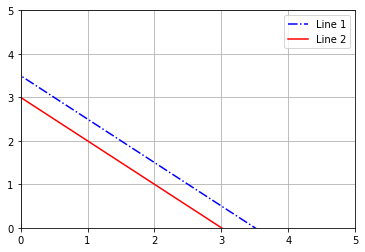

In [2]:
# use for parts i-iii
# Parameters for the first line
a1 = 2
b1 = 2
c1 = 7

# Parameters for the second line
a2 = 1
b2 = 1
c2 = 3

x1, y1 = line_xy(a1,b1,c1)
x2, y2 = line_xy(a2,b2,c2)

fig = plt.figure()
ax = fig.add_subplot(111,xlim=[0,5],ylim=[0,5])
ax.plot(x1,y1,'-.b')
ax.plot(x2,y2,'r')
ax.grid(True)
ax.legend(['Line 1','Line 2'])

### Graphing System of Three Equations

For a system of three equations, each equation can be rewritten as $ax+by+cz=d$. This is the equation for a plane in $\mathbb{R}^3$. As you might have already guessed, the solution for the system of equations must lie on all of the planes described by the system.

In the next block, there is code to graph planes. Play around with the parameters $a1,b1,\ldots,d3$ to create different planes. Change the parameters to describe the system of equations from the second half of Problem 1a. Use the graphs to explain the results you obtained in Problem 1a parts iv-vi.

**Rotate the figures to make sure you see all the graphs. It will take a few seconds for the figure to load.**

In [3]:
# Use for parts iv-vi

# Parameters for the first plane
a1 = 2
b1 = 1
c1 = 1
d1 = 2

# Parameters for the second plane
a2 = 1
b2 = -1
c2 = 0
d2 = 1

# Parameters for the third plane
a3 = 0
b3 = 2
c3 = 1
d3 = 1

# Plotting 
x1, y1, z1 = plane_xyz(a1,b1,c1,d1)
x2, y2, z2 = plane_xyz(a2,b2,c2,d2)
x3, y3, z3 = plane_xyz(a3,b3,c3,d3)

print(x1.shape)
blue=[[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']]
green=[[0, 'rgb(0,255,0)'], [1, 'rgb(0,255,0)']]
red=[[0, 'rgb(255,0,0)'], [1, 'rgb(255,0,0)']]

trace1 = Surface(z=z1, x=x1,y=y1, colorscale=blue,name='First Plane')
trace2 = Surface(z=z2, x=x2,y=y2, colorscale=green, name='Second Plane')
trace3 = Surface(z=z3, x=x3,y=y3, colorscale=red, name='Third Plane')
data = Data([trace1,trace2, trace3])
fig = Figure(data=data,layout=layout)
offline.iplot(fig, filename='planes')

(100,)
